In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_15 = pd.read_csv("2015.csv")
data_16 = pd.read_csv("2016.csv")
data_17 = pd.read_csv("2017.csv")
data_18 = pd.read_csv("2018.csv")
data_19 = pd.read_csv("2019.csv")
data_20 = pd.read_csv("2020.csv")
data_21 = pd.read_csv("2021.csv")
data_22 = pd.read_csv("2022.csv")

In [3]:
data_15 = data_15.iloc[:, :4]
data_16 = data_16.iloc[:, :4]
data_17 = data_17.iloc[:, :4]
data_18 = data_18.iloc[:, :4]
data_19 = data_19.iloc[:, :4]
data_20 = data_20.iloc[:, :4]
data_21 = data_21.iloc[:, :4]
data_22 = data_22.iloc[:, :4]

In [4]:
data_15['Year'] = 2015
data_16['Year'] = 2016
data_17['Year'] = 2017
data_18['Year'] = 2018
data_19['Year'] = 2019
data_20['Year'] = 2020
data_21['Year'] = 2021
data_22['Year'] = 2022

In [5]:
data_15 = data_15.drop(columns='Region')
data_15 = data_15.drop(columns='Happiness Rank')
data_16 = data_16.drop(columns='Region')
data_16 = data_16.drop(columns='Happiness Rank')

In [6]:
data_17 = data_17.drop(columns='Whisker.high')
data_17 = data_17.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score'})
data_17 = data_17.drop(columns='Happiness Rank')

In [7]:
data_18 = data_18.drop(columns='GDP per capita')
data_18 = data_18.drop(columns='Overall rank')
data_18 = data_18.rename(columns={'Country or region': 'Country'})
data_18 = data_18.rename(columns={'Score': 'Happiness Score'})
data_19 = data_19.drop(columns='GDP per capita')
data_19 = data_19.drop(columns='Overall rank')
data_19 = data_19.rename(columns={'Country or region': 'Country'})
data_19 = data_19.rename(columns={'Score': 'Happiness Score'})

In [8]:
data_20 = data_20.drop(columns='Regional indicator')
data_20 = data_20.drop(columns='Standard error of ladder score')
data_20 = data_20.rename(columns={'Ladder score': 'Happiness Score'})
data_20 = data_20.rename(columns={'Country name': 'Country'})
data_21 = data_21.drop(columns='Regional indicator')
data_21 = data_21.drop(columns='Standard error of ladder score')
data_21 = data_21.rename(columns={'Ladder score': 'Happiness Score'})
data_21 = data_21.rename(columns={'Country name': 'Country'})

In [9]:
data_22 = data_22.drop(columns='Whisker-high')
data_22 = data_22.drop(columns='RANK')
data_22 = data_22.drop(data_22.index[-1])
data_22 = data_22.rename(columns={'Happiness score': 'Happiness Score'})
data_22['Happiness Score'] = data_22['Happiness Score'].str.replace(',', '').astype(float)
data_22['Happiness Score'] = data_22['Happiness Score'] / 1000

In [10]:
happy_df = pd.concat([data_15, data_16, data_17, data_18, data_19, data_20, data_21, data_22])
happy_df['Country'] = data_22['Country'].replace('*', '') #not working

In [11]:
population_df = pd.read_csv("population_by_country_2020.csv")
population_df = population_df.iloc[:, :2]

In [12]:
data = pd.read_csv("total_deaths.csv")
death_df = pd.DataFrame(data)
death_df = death_df.iloc[12:]
death_df = death_df.iloc[::60, :]
death_df.fillna(0, inplace=True)

In [13]:
pop_series = population_df.set_index('Country (or dependency)')['Population (2020)']
death_div_pop = death_df.div(pop_series, axis=1)
death_div_pop.fillna(0, inplace=True)

In [14]:
death_div_pop = death_div_pop.rename(columns={'date': 'average'})

In [15]:
#deleting all countries / regions that have zero deaths / no population data resulting in zeros across every row
last_row = death_div_pop.iloc[-1]
null_cols = last_row == 0
cols_to_keep = ~null_cols
death_div_pop = death_div_pop.loc[:, cols_to_keep]

In [16]:
#old code but was working, black box at this point

data = pd.read_csv("total_deaths.csv")
total_deaths = pd.DataFrame(data)
total_deaths = total_deaths.iloc[12:]
total_deaths = total_deaths.iloc[::60, :]

population_data = pd.read_csv("population_by_country_2020.csv")
population_data = population_data.iloc[:, :2]

deaths_div_population = pd.DataFrame(index=total_deaths.index, columns=total_deaths.columns)
deaths_div_population.fillna(0, inplace=True)

for country in total_deaths.columns:
    population_series = population_data.loc[population_data['Country (or dependency)'] == country, 'Population (2020)']
    if not population_series.empty:
        population = population_series.values[0]
        #normalized_deaths is a dataframe that is deaths/population
        deaths_div_population[country] = total_deaths[country] / population
    else:
        pass
        
deaths_div_population.fillna(0, inplace=True)
deaths_div_population.replace(0,-1, inplace=True)
deaths_div_population['pop_death_average'] = deaths_div_population.apply(lambda row: row[row > 0].mean(), axis=1)

dates = total_deaths
dates = dates.iloc[:, 0:1]

deaths_div_population = deaths_div_population * 100

comparative_death_div_pop = deaths_div_population.apply(lambda row: row.sub(row.iloc[-1]), axis=1)

for i in range(len(comparative_death_div_pop)):
    for j in range(len(comparative_death_div_pop.columns)):
        if (comparative_death_div_pop.iloc[i,j] < -5):
            comparative_death_div_pop.iloc[i,j] = 0
            
relative_death_per_pop = pd.merge(dates, comparative_death_div_pop, left_index=True, right_index=True)

start_date = 2020
dates = []

for i in range(20):
    dates.append(start_date)
    start_date += 0.16
relative_death_per_pop['date_y'] = dates

In [17]:
#           5 main dataframes have been created at this point       #

# happy_df: big dataframe of all countries happiness scores from 2015-2022
# population_df: dataframe of country populations in 2020
# death_df: cumulative deaths per country in COVID
# death_div_pop: deaths/population for countries
# relative_death_per_pop: the difference for each country compared to the average amount of a country's death / pop 
happy_df.to_csv("happiness_df.csv")
population_df.to_csv("population_df.csv")
death_df.to_csv("death_df.csv")
death_div_pop.to_csv("death_div_pop_df.csv")

In [18]:
happiness_data_filtered = happy_df.loc[happy_df['Year'].isin([2018, 2022])]
grouped_data = happiness_data_filtered.groupby(['Country', 'Year'])['Happiness Score'].mean().unstack()
difference = grouped_data[2018] - grouped_data[2022]
sorted_countries = difference.sort_values(ascending=False)
#print('Top 10 countries with the biggest change in Cantril ladder score from 2022 to 2018:')
#print(sorted_countries.head(10))
greatest = grouped_data[2022] - grouped_data[2018]
sorted_countries = difference.sort_values(ascending=True)
#print('Top 10 countries with the biggest change in Cantril ladder score from 2022 to 2018:')
#print(sorted_countries.head(10))

In [19]:
highest_vals = death_div_pop.iloc[-1].nlargest(10)
highest_cols = highest_vals.index.tolist()
print('Top 10 countries with the largest deaths / population')
print(highest_cols)

Top 10 countries with the largest deaths / population
['Peru', 'Bulgaria', 'Hungary', 'Bosnia and Herzegovina', 'North Macedonia', 'Montenegro', 'Slovenia', 'Croatia', 'Georgia', 'Slovakia']


In [ ]:
highest_cols.pop()

In [174]:
def get_happiness_scores(country_name):
    mask = happy_df['Country'] == country_name
    happiness_scores = happy_df.loc[mask, 'Happiness Score'].tolist()
    return happiness_scores

def plot_country_happy(happiness_scores):
    years = range(2015, 2023)
    plt.plot(years, happiness_scores)
    plt.xlabel('Year')
    plt.ylabel('Happiness Scores')
    plt.title('Change in Happiness from 2015 to 2022')
    plt.show()
    
def plot_country_death(country):
    plt.plot(relative_death_per_pop["date_y"], relative_death_per_pop[country], color='red')
    plt.title(country)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [161]:
def plot_countries_happiness_list(country_list, ymin, ymax):
    num_countries = len(country_list)
    num_cols = 3
    num_rows = (num_countries + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))
    
    for i, country in enumerate(country_list):
        row = i // num_cols
        col = i % num_cols
        scores = get_happiness_scores(country)
        ax = axes[row][col]
        ax.plot(scores)
        ax.set_title(country)
        ax.set_ylim(ymin, ymax)
        ax.set_xlabel('Year')
        ax.set_ylabel('Happiness Score')
        ax.set_xticks(range(0, 8, 3))
        ax.set_xticklabels(range(2015, 2023, 3))
        ax.plot(scores, marker='o', markersize=4)

        
    fig.subplots_adjust(hspace=0.5)
    plt.show()

def plot_countries_realtive_deaths_list(country_list):
    n_rows = 3
    n_cols = 3
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12), sharex=True)

    for i, country in enumerate(country_list):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row][col]
        ax.plot(relative_death_per_pop["date_y"], relative_death_per_pop[country], color='red')
        ax.set_title(country)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # show the plot
    plt.show()

In [219]:
def get_happiest_countries(year):
    happy = happy_df.loc[happy_df['Year'] == year]
    sorted_happy = happy.sort_values(by='Happiness Score', ascending=False)
    return list(sorted_happy['Country'][:9])

def get_least_countries(year):
    happy = happy_df.loc[happy_df['Year'] == year]
    sorted_happy = happy.sort_values(by='Happiness Score', ascending=True)
    return list(sorted_happy['Country'][:9])

In [156]:
# Functions created at this point

# get_happiness_scores(country_name): returns a list of a countries happiness scores
# plot_country(list): takes a list of scores and plots the countries happiness
# plot_countries_happiness: takes a list of countries and plots all their happiness charts
# plot_countries_realtive_deaths: takes in a list of countries and plots their relative death / pop charts
# get_happiest_countries(year): takes a year and returns the top 9 happiest countries that year

In [157]:
# Things I'd like to accomplish

# Create a function that looks at both happiness & covid side by side, just those two, color cordinated
# Look at the top 10 happiest countries for 2022 & top 10 least happy countries
# Look at top 10 highest covid rates
# Look at countries which notoriously did well - New Zealand, Senegal
# Look at "powerful countries" - USA, UK, China, France, Germany

In [179]:
def get_happiness_scores(country_name):
    mask = happy_df['Country'] == country_name
    happiness_scores = happy_df.loc[mask, 'Happiness Score'].tolist()
    return happiness_scores

def plot_country_happy(happiness_scores):
    years = range(2015, 2023)
    plt.plot(years, happiness_scores)
    plt.xlabel('Year')
    plt.ylabel('Happiness Scores')
    plt.title('Change in Happiness from 2015 to 2022')
    plt.show()
    
def plot_country_death(country):
    plt.plot(relative_death_per_pop["date_y"], relative_death_per_pop[country], color='red')
    plt.title(country)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [216]:
def overlayed_graphs(country_name):
    fig, ax1 = plt.subplots()
    years = range(2003, 2023)
    happy_scores = get_happiness_scores(country_name)
    death_scores = relative_death_per_pop[country].tolist()

    
    ax1.plot(years, happy_scores)
    ax2 = ax1.twinx()
    ax2.plot(years, death_scores)

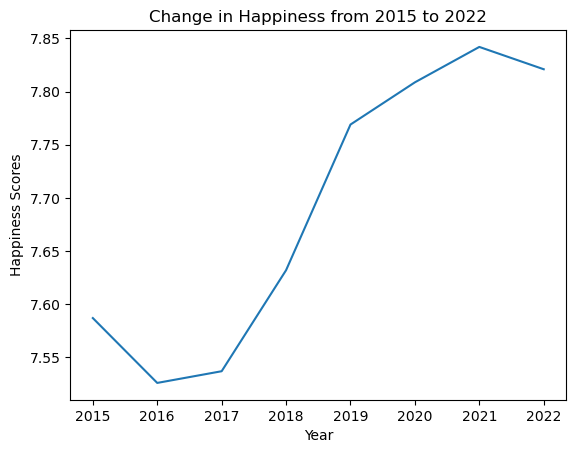

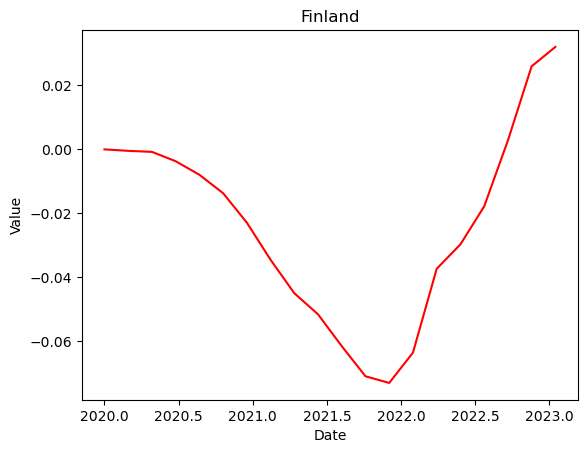

In [217]:
plot_country_happy(get_happiness_scores("Finland"))
plot_country_death("Finland")

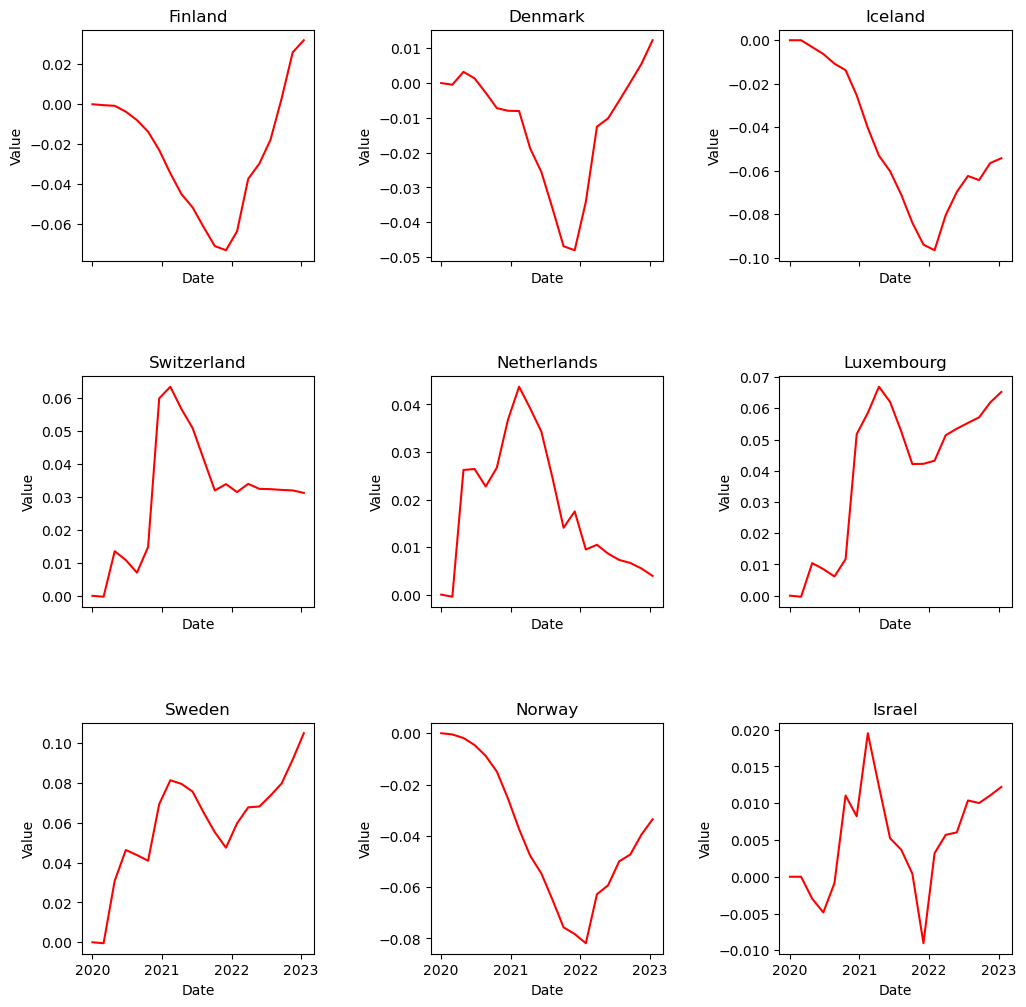

In [65]:
a = get_happiest_countries_2022()
lux_index = a.index('Luxembourg*')
a[lux_index] = 'Luxembourg'
plot_countries_realtive_deaths(a)

In [ ]:
# Things I'd like to accomplish May 2, 2023

# Create a function that looks at both happiness & covid side by side, just those two, color cordinated
# Look at the top 10 happiest countries for 2022 & top 10 least happy countries
# Look at top 10 highest covid rates
# Look at countries which notoriously did well - New Zealand, Senegal
# Look at "powerful countries" - USA, UK, China, France, Germany

In [223]:
least = get_least_countries(2022)
happy = get_happiest_countries(2022)
print(least)
print(happy)

['Afghanistan', 'Lebanon', 'Zimbabwe', 'Rwanda*', 'Botswana*', 'Lesotho*', 'Sierra Leone', 'Tanzania', 'Malawi']
['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Luxembourg*', 'Sweden', 'Norway', 'Israel']
